# Assignment #2


Deep Learning / Fall 1398, Iran University of Science and Technology



---



**Please pay attention to these notes:**

<br/>
- **Assignment Due: ** 1398/9/23 23:59
- If you need any additional information, please review the assignment page on the course website.
- We always recommend co-operation and discussion in groups for assignments. However, each student has to finish all the questions by himself/herself. If our matching system identifies any sort of copying, you'll be responsible for consequences. So, please mention his/her name if you have a team-mate.
- Students who audit this course should submit their assignments like other students to be qualified for attending the rest of the sessions.
- Finding any sort of copying will zero down that assignment grade and also will be counted as two negative assignment for your final score.
- When you are ready to submit, please follow the instructions at the end of this notebook.
- If you have any questions about this assignment, feel free to drop us a line. You may also post your questions on the course Forum page.
- You must run this notebook on Google Colab platform, it depends on Google Colab VM for some of its dependencies.
- **Before starting to work on the assignment Please fill your name in the next section *AND Remember to RUN the cell.* **

<br/>


Assignment Page: []()

Course Forum: [https://groups.google.com/forum/#!forum/dl981/](https://groups.google.com/forum/#!forum/dl981/)



---



Fill your information here & run the cell

In [1]:
#@title Enter your information & "RUN the cell!!" { run: "auto" }
student_id = 95522031 #@param {type:"integer"}
student_name = "AmirMahdi Nikukaran" #@param {type:"string"}
Your_Github_account_Email = "amirmahdinikoukaran@gmail.com" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)


from pathlib import Path

ASSIGNMENT_PATH = Path('asg02')
ASSIGNMENT_PATH.mkdir(parents=True, exist_ok=True)

your student id: 95522031
your name: AmirMahdi Nikukaran


# 1. Special Bus Line

Consider the public transport bus service. It has many gates on roads in the city and a particular lane for bus transportation.


This lane is also used for the transportation of emergency vehicles like ambulances, police cars and fire trucks, and private cars are banned from using it.


Your task is to create a system to classify these two classes of vehicles.

### Dataset
---
In this task, you should build your dataset based on an arbitrary approach. Of course, we suggest having a look at [this](https://forums.fast.ai/t/tips-for-building-large-image-datasets/26688) link if you do not have any idea about making the dataset.



Please explain your dataset making method.

$\color{red}{\text{Write your answer here}}$

با استفاده از

 google_images_download 
 
 داده ها را دانلود می کنیم. داده ها با برچسب مثبت شامل 4 دسته 125 تایی از اتوبوس ها و آمبولانس ها و ماشین های پلیس و ماشین های آتشنشانی که جمعا 500 تا با برچسب
 
  permitted 
  
  دانلود و ذخیره شده اند. داده ها با بر چسب منفی نیز 500 ماشین سواری هستند که با برچسب
  
   banned 
   
   ذخیره شده اند. سپس داده ها را به نسبت داده تست 20 درصد تقسیم بندی کردیم.

In [2]:
! pip install google_images_download

     |████████████████████████████████| 911kB 47.8MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=0036735a27a81ca883aaaca58dc86c8d2b4827e3302530fe6e7a24dc84d11dd1
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [3]:
! sudo apt-get install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 7 not upgraded.
Need to get 71.9 MB of archives.
After this operation, 257 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 78.0.3904.108-0ubuntu0.18.04.1 [1,078 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 78.

In [4]:
! googleimagesdownload -k "buses" -s medium -l 125 -i permitted --chromedriver '/usr/lib/chromium-browser/chromedriver'


Item no.: 1 --> Item name = buses
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.1000x-1.jpg
Completed Image ====> 2.Alstom_Aptis_2019.jpg
Completed Image ====> 3.one-of-septa-s-new-electric-buses-darryl-murphy.original-768x593.jpg
Completed Image ====> 4.1860x1050-volvo-buses-transdev-pressrelease-newsintro.jpg
Completed Image ====> 5.WMATA_Metroway-729x364.jpg
Completed Image ====> 6.88092d1a5f164aa9bb93f08c0aa380091.jpg
Completed Image ====> 7.ebuscoverphoto.png
Completed Image ====> 8.110619_White_Plains_ebus.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 9.trinity_transportation_school_bus.jpg
Completed Image ====> 10.caf5e1d0-43db-4b33-9c79-70b7fbdae26f.sized-1000x1000.JPG
Completed Image ====> 11.2019-10-08-electric-bus-dsc6157.jpg
Completed Image ====> 12.Proterra-10-final-1.jpg
Completed Image ====> 13.p07l3b94.jpg
Completed Image ====> 14.reykjavik-city-buses-

In [5]:
! googleimagesdownload -k "ambulances" -s medium -l 125 -i permitted --chromedriver '/usr/lib/chromium-browser/chromedriver'


Item no.: 1 --> Item name = ambulances
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.blogambulance.jpg
Completed Image ====> 2.merlin_133369826_d9991233-cbf8-4b7c-a183-5887613107e9-articleLarge.jpg
Completed Image ====> 3.web1_Ambulance2.jpg
Completed Image ====> 4.960x0.jpg
Completed Image ====> 5.Cleveland_Ambulance__OH_.5d1671803dc42.jpg
Completed Image ====> 6.austin-travis-county-ems-ambulances-offer-eye-catching-effective-locations-intersection-clearance-850x588.jpeg
Completed Image ====> 7.image.jpg
Completed Image ====> 8.ambulance_body_1.jpg
Completed Image ====> 9.6925619739_e1885e91c7_b-1024x646.jpg
Completed Image ====> 10.1519379748-unit_before.png
Completed Image ====> 11.Ambulance-Main-Banner-Image-5-1024x541.jpg
Completed Image ====> 12.ambulances-nhs.jpg
Completed Image ====> 13.9ea10057dddbd76ad39d18fb6aa93b90.jpg
Completed Image ====> 14.safe-careflite-ambulance-refle_10862

In [6]:
! googleimagesdownload -k "police cars" -s medium -l 125 -i permitted --chromedriver '/usr/lib/chromium-browser/chromedriver'


Item no.: 1 --> Item name = police cars
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.Blotter2.jpg
Completed Image ====> 2.ZZRP4JQJOFH65PXTCAFXMHOTBQ.JPG
Invalid or missing image format. Skipping...
Completed Image ====> 3.5155488_022519-wtvd-clayton-police-cars-am-vid.jpg
Completed Image ====> 4.0a958aa8-53a6-48fd-b0ae-a19d6e3b9820-large16x9_STEPHEN1355_frame_241.png
Completed Image ====> 5.hqdefault.jpg
Completed Image ====> 6.c6916f3b72039dc258f8f4e910deb738.jpg
Completed Image ====> 7.5e55cef7-ba6c-48e6-b477-df217b0f350e-large16x9_policecar.PNG
Completed Image ====> 8.cq5dam.web.768.768.jpeg
Completed Image ====> 9.police-cars-2.jpg
Completed Image ====> 10.In-God-We-Trust.jpg
Completed Image ====> 11.FZDB5OTTO5FFJNU7LUXZFSNONI.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 12.m-fhp-charger-day.jpg
Completed Image ====> 13.170714113914-austin-police-department-ford

In [8]:
! googleimagesdownload -k "fire trucks" -s medium -l 125 -i permitted --chromedriver '/usr/lib/chromium-browser/chromedriver'


Item no.: 1 --> Item name = fire trucks
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.pierce2.png
Completed Image ====> 2.chicago-firedept-20170317_181612-edit-65bb9214b55dc2c0728466b01af9c921a8cbfca7-s800-c85.jpg
Completed Image ====> 3.920x920.jpg
Completed Image ====> 4.1607FA_Adams1.jpg
Completed Image ====> 5.31078941_H25534555-720x445.jpg
Completed Image ====> 6.Pierce_Saber_Custom_Chassis_with_Ford_PowerStroke_Turbo_Diesel_Power_Train_qay33n.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 7.ft-49.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 8.pierce-pumper.png
Completed Image ====> 9.2583_LadderTruck2-e1536353643879-1024x576.jpg
Completed Image ====> 10.5c40bc62b1af0.image.jpg
Completed Image ====> 11.fire-1.jpg
Completed Image ====> 12.san-diego-fire-trucks-2019-__-688x516-a.jpg
Completed Image ====> 13.firetruckhed.jpg
Completed Image 

In [9]:
! googleimagesdownload -k "car,lux car" -s medium -l 250 -i banned --chromedriver '/usr/lib/chromium-browser/chromedriver'


Item no.: 1 --> Item name = car
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.selling-car.png
Completed Image ====> 2.MWBC-Pacifica-DEC-EPPCash-2.jpg
Completed Image ====> 3.960x0.jpg
IOError on an image...trying next one... Error: The read operation timed out
Completed Image ====> 4.911-road-3629a.jpg
IOError on an image...trying next one... Error: The read operation timed out
Completed Image ====> 5.02-toyota-corolla-2020-angle--exterior--front--grey-e1569431125507.jpg
Completed Image ====> 6.1a-2020-kia-telluride-kbb.jpg
Completed Image ====> 7.Lam1_trans_NvBQzQNjv4BqnAdySV0BR-4fDN_-_p756cVfcy8zLGPV4EhRkjQy7tg.jpg
Completed Image ====> 8.large-2479-s-classsaloon.jpg
IOError on an image...trying next one... Error: The read operation timed out
Completed Image ====> 9.MY19-Insight-side-profile-updated-992x428.png
Completed Image ====> 10.637873-tesla-model-s-2019-640x360.jpg
Completed Image =

In [10]:
import os
from sklearn.model_selection import train_test_split

images = {'train': [], 'test': []} # Put the images here
labels = {'train': [], 'test': []} # Put the labels here

total_images = [os.path.join("downloads/permitted/", img) for img in os.listdir("downloads/permitted/")] + [os.path.join("downloads/banned/", img) for img in os.listdir("downloads/banned/")]
total_labels = [0 for img in os.listdir("downloads/permitted/")] + [1 for img in os.listdir("downloads/banned/")]
images['train'], images['test'], labels['train'], labels['test'] = train_test_split(total_images, total_labels, test_size = 0.2, random_state = 0)
print(images['train'])
print(images['test'])
print(labels['train'])
print(labels['test'])

['downloads/banned/184.a4_hero.png', 'downloads/banned/111.2020_Acura_NSX_Curva_Red_XL.jpg', 'downloads/permitted/22.pariscurrent.jpg', 'downloads/banned/217.angular-front.jpg', 'downloads/banned/81.b083fe955a0f188c131505.jpg', 'downloads/banned/21.misc-featBnr-CBSDodgeRamTruck_wcm.jpg', 'downloads/banned/119.2019-lacrosse-avenir-dark-shadow-metallic.jpg', 'downloads/banned/220.P1147946%20(1)_400_thb.jpg', 'downloads/banned/225.2020-chrysler-hybrid-bhp-slider-poster.jpg', 'downloads/banned/157.aboutmccormicks.jpg', 'downloads/permitted/116.ambulance.jpg', 'downloads/banned/51.offers-2018-ev-cabrio.png', 'downloads/permitted/30.FordCopCar_764A0414-640x360.jpg', 'downloads/banned/126.gettyimages-1183660380.jpg', 'downloads/banned/221.MY20-Civic-Sedan-non-VLP-nav-2x.png', 'downloads/banned/227.Maruti-Suzuki-New-Swift-Exterior-117654.jpg', 'downloads/permitted/6.c6916f3b72039dc258f8f4e910deb738.jpg', 'downloads/permitted/13.p07l3b94.jpg', 'downloads/permitted/27.file73jtdghzv9zh3u6knnq-157

In [0]:
from PIL import Image
import shutil
os.mkdir("train")
os.mkdir("test")
os.mkdir("train/permitted")
os.mkdir("test/permitted")
os.mkdir("train/banned")
os.mkdir("test/banned")
for img in images['train']:
  try:
    f = Image.open(img)
    f.close()
    if(img.split("/")[1] == "permitted"):
      dest = shutil.copy(img, "train/permitted/" + img.split("/")[2])
    elif(img.split("/")[1] == "banned"):
      dest = shutil.copy(img, "train/banned/" + img.split("/")[2])
  except:
    continue
for img in images['test']:
  try:
    f = Image.open(img)
    f.close()
    if(img.split("/")[1] == "permitted"):
      dest = shutil.copy(img, "test/permitted/" + img.split("/")[2])
    elif(img.split("/")[1] == "banned"):
      dest = shutil.copy(img, "test/banned/" + img.split("/")[2])
  except:
    continue

In [12]:
for i in range(len(images['train'])):
  if(images['train'][i].split("/")[1] == "permitted"):
    images['train'][i] = os.path.join("train/permitted/", images['train'][i].split("/")[2])
  elif(images['train'][i].split("/")[1] == "banned"):
    images['train'][i] = os.path.join("train/banned/", images['train'][i].split("/")[2])
for i in range(len(images['test'])):
  if(images['test'][i].split("/")[1] == "permitted"):
    images['test'][i] = os.path.join("test/permitted/", images['test'][i].split("/")[2])
  elif(images['test'][i].split("/")[1] == "banned"):
    images['test'][i] = os.path.join("test/banned/", images['test'][i].split("/")[2])
print(images['train'])
print(images['test'])
print(len(images['train']))
print(len(images['test']))

['train/banned/184.a4_hero.png', 'train/banned/111.2020_Acura_NSX_Curva_Red_XL.jpg', 'train/permitted/22.pariscurrent.jpg', 'train/banned/217.angular-front.jpg', 'train/banned/81.b083fe955a0f188c131505.jpg', 'train/banned/21.misc-featBnr-CBSDodgeRamTruck_wcm.jpg', 'train/banned/119.2019-lacrosse-avenir-dark-shadow-metallic.jpg', 'train/banned/220.P1147946%20(1)_400_thb.jpg', 'train/banned/225.2020-chrysler-hybrid-bhp-slider-poster.jpg', 'train/banned/157.aboutmccormicks.jpg', 'train/permitted/116.ambulance.jpg', 'train/banned/51.offers-2018-ev-cabrio.png', 'train/permitted/30.FordCopCar_764A0414-640x360.jpg', 'train/banned/126.gettyimages-1183660380.jpg', 'train/banned/221.MY20-Civic-Sedan-non-VLP-nav-2x.png', 'train/banned/227.Maruti-Suzuki-New-Swift-Exterior-117654.jpg', 'train/permitted/6.c6916f3b72039dc258f8f4e910deb738.jpg', 'train/permitted/13.p07l3b94.jpg', 'train/permitted/27.file73jtdghzv9zh3u6knnq-1576378248.jpg', 'train/banned/174.adi-a1-enterijer-lux-car-rental.jpg', 'train

### Implementation
---
You can use from Keras in this assignment.

Preprocess your data in this cell.

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "train",
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory("test", 
                                                        target_size=(150, 150), 
                                                        batch_size=20, 
                                                        class_mode='binary')

Using TensorFlow backend.


Found 791 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


Build and train your model in the following cell.

Use generator and augmentation in order to feed data to the network.

In [14]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         


In [0]:
from keras import optimizers
from keras import backend as K
from keras import metrics

def recall(y_true, y_pred):
    """
    Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    """
    Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.

    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))

In [16]:
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=[metrics.binary_accuracy, f1 ,recall ,precision])
history = model.fit_generator(
                train_generator,
                steps_per_epoch=100,
                epochs=30,
                validation_data=validation_generator,
                validation_steps=50)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/30




/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')





100/100 [==============================] - 37s 368ms/step - loss: 0.6912 - binary_accuracy: 0.5385 - f1: nan - recall: 0.7094 - precision: 0.4979 - val_loss: 0.7078 - val_binary_accuracy: 0.4847 - val_f1: 0.6455 - val_recall: 0.9889 - val_precision: 0.4871
Epoch 2/30
100/100 [==============================] - 30s 300ms/step - loss: 0.6665 - binary_accuracy: 0.5865 - f1: nan - recall: 0.6352 - precision: 0.6163 - val_loss: 0.6334 - val_binary_accuracy: 0.6224 - val_f1: 0.7062 - val_recall: 0.9512 - val_precision: 0.5711
Epoch 3/30
100/100 [==============================] - 30s 305ms/step - loss: 0.6205 - binary_accuracy: 0.6693 - f1: nan - recall: 0.6908 - precision: 0.6683 - val_loss: 0.6062 - val_binary_accuracy: 0.6735 - val_f1: 0.7155 - val_recall: 0.8767 - val_precision: 0.6182
Epoch 4/30
100/100 [==============================] - 30s 304ms/step - loss: 0.5984 - binary_accuracy: 0.6751 - f1: nan - recall: 0.6990 - precision: 0.7011 - val_loss: 0.5457 - val_binary_accuracy: 0.714

Now, test your model, report the f1-score, recall and precision, and then save the model in a file with path 'ASSIGNMENT_PATH / 'my_model.h5''.

Plot loss and accuracy.

In [0]:
model.save(ASSIGNMENT_PATH / 'my_model.h5')

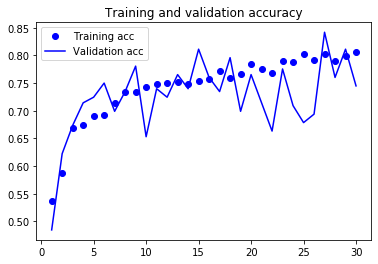

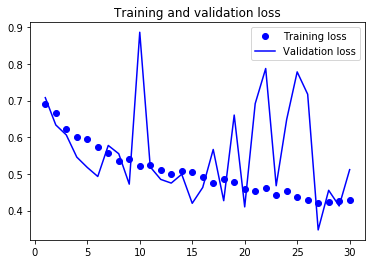

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Please explain that what type of loss and accuracy you set for training your model and why?

$\color{red}{\text{Write your answer here}}$

از آنجا که دو کلاس داریم و طبقه بندی ما به صورت باینری است باید از پارامترهای مناسب طبقه بندی باینری استفاده نمود که به صورت صفر و یکی عمل کند و در طبقه بندی راحت تر تصمیم بگیرد. در اینجا برای 

accuracy

از 

binary_accuracy

و برای 

loss function

از

binary_crossentropy

استفاده نمودیم که مناسب تر از پارامترهای مربوط به 

categorical

مثل 

categorical_accuracy,categorical_crossentropy

برای این تسک است.

Visualize some layers and analyze them.

In [0]:
def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  
  x += 0.5
  x = np.clip(x, 0, 1)
  
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [0]:
import numpy as np

def generate_pattern(layer_name, filter_index, size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])

  grads = K.gradients(loss, model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

  iterate = K.function([model.input], [loss, grads])
  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
  
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
  
  img = input_img_data[0]
  return deprocess_image(img)

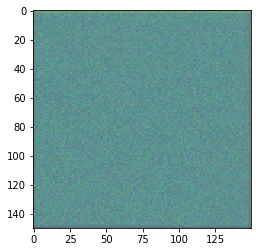

In [26]:
layer_name = 'conv2d_1'
plt.imshow(generate_pattern(layer_name, 9))

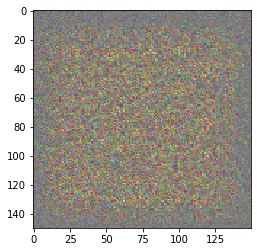

In [45]:
plt.imshow(generate_pattern(layer_name, 2))

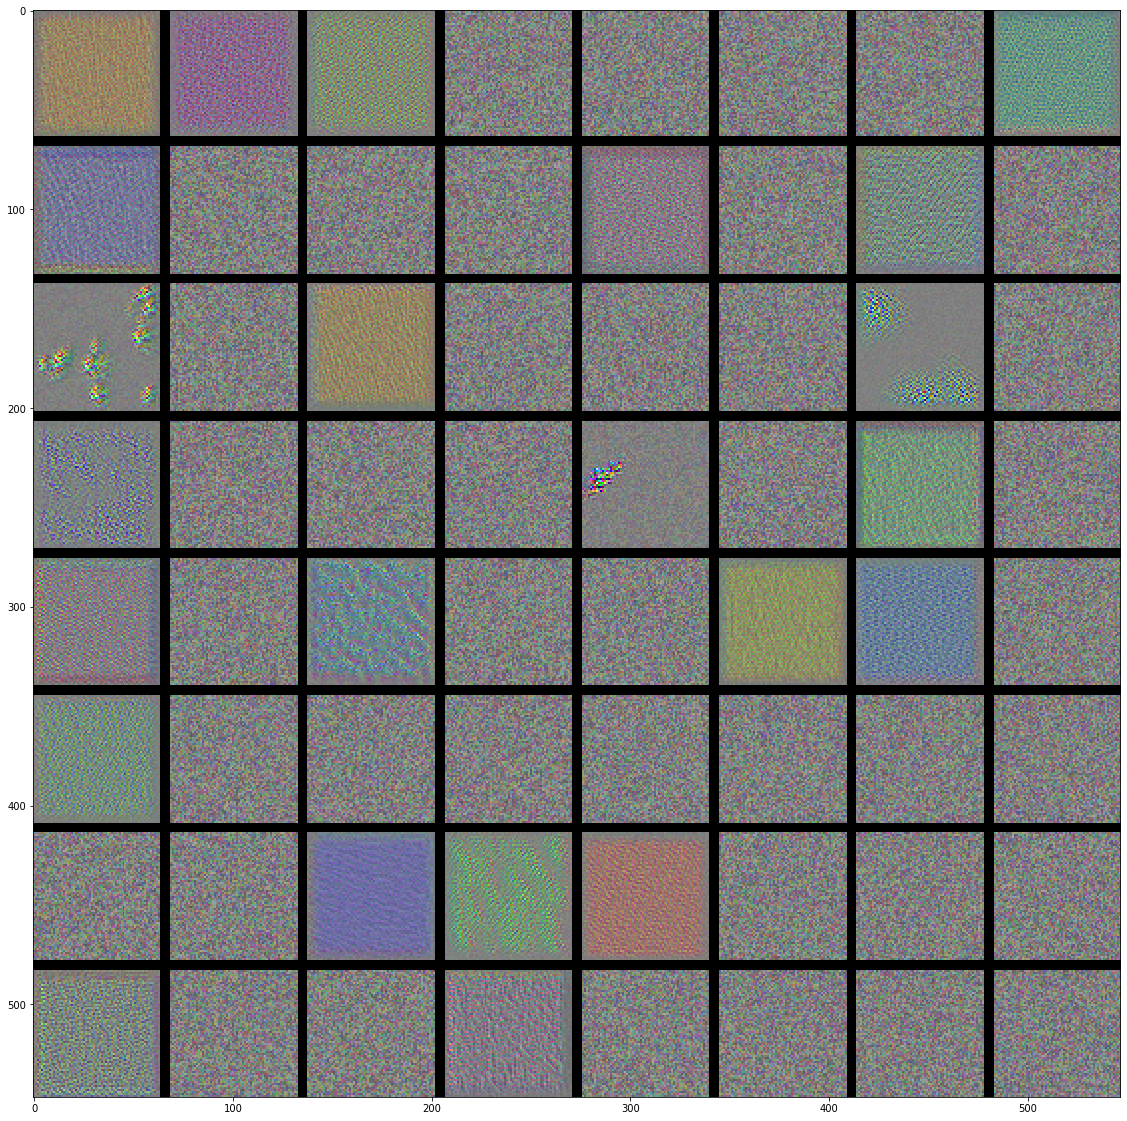

In [27]:
layer_name = 'conv2d_2'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
  for j in range(8):
    filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
    
    horizontal_start = i * size + i * margin
    horizontal_end = horizontal_start + size
    vertical_start = j * size + j * margin
    vertical_end = vertical_start + size
    results[horizontal_start:horizontal_end,
            vertical_start:vertical_end] = filter_img/255

plt.figure(figsize=(20, 20))
plt.imshow(results)

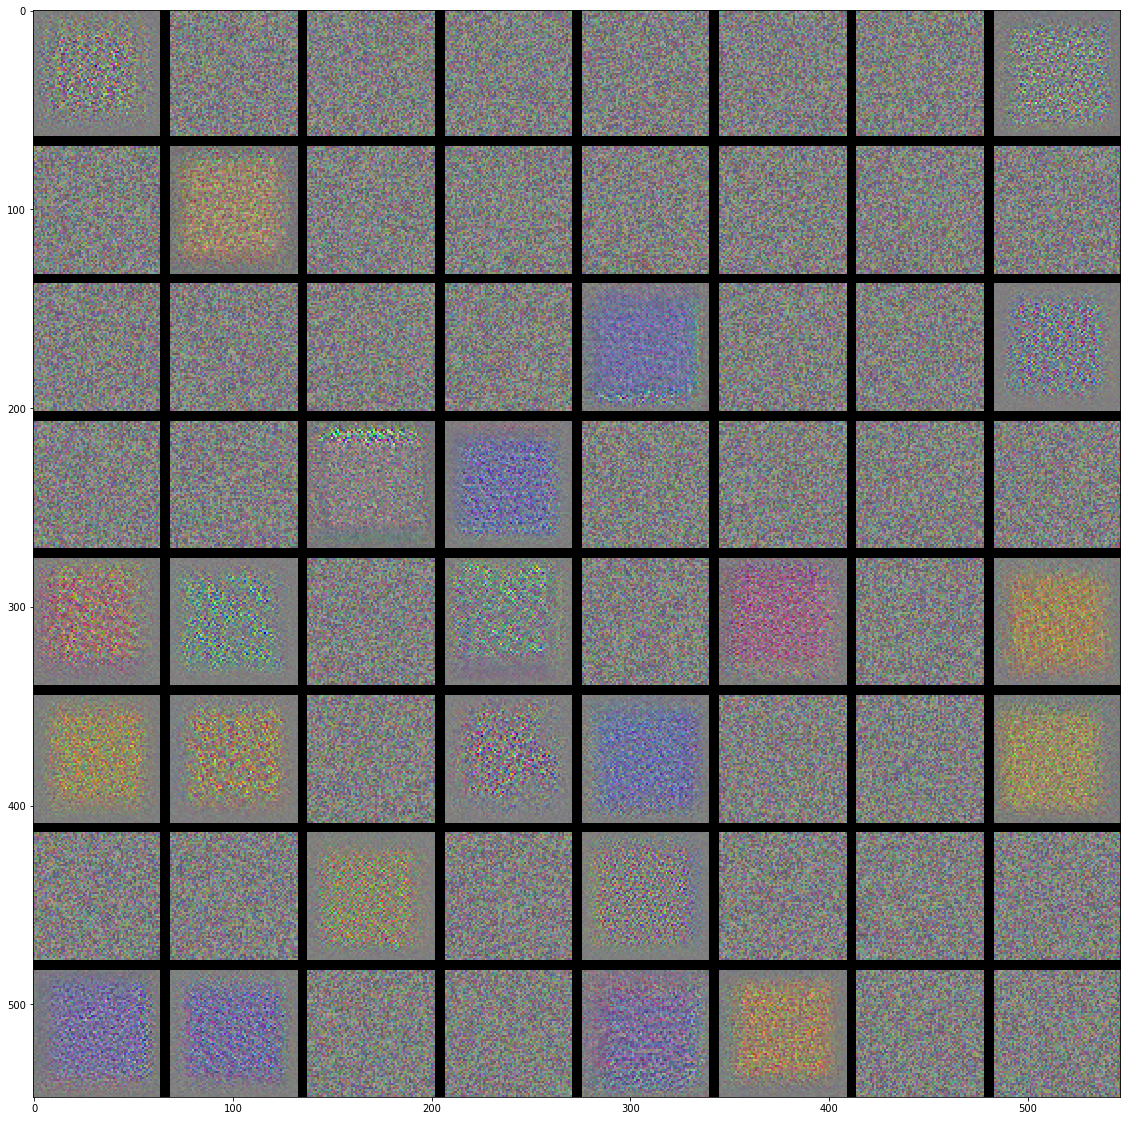

In [28]:
layer_name = 'conv2d_3'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
  for j in range(8):
    filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
    
    horizontal_start = i * size + i * margin
    horizontal_end = horizontal_start + size
    vertical_start = j * size + j * margin
    vertical_end = vertical_start + size
    results[horizontal_start:horizontal_end,
            vertical_start:vertical_end] = filter_img/255

plt.figure(figsize=(20, 20))
plt.imshow(results)

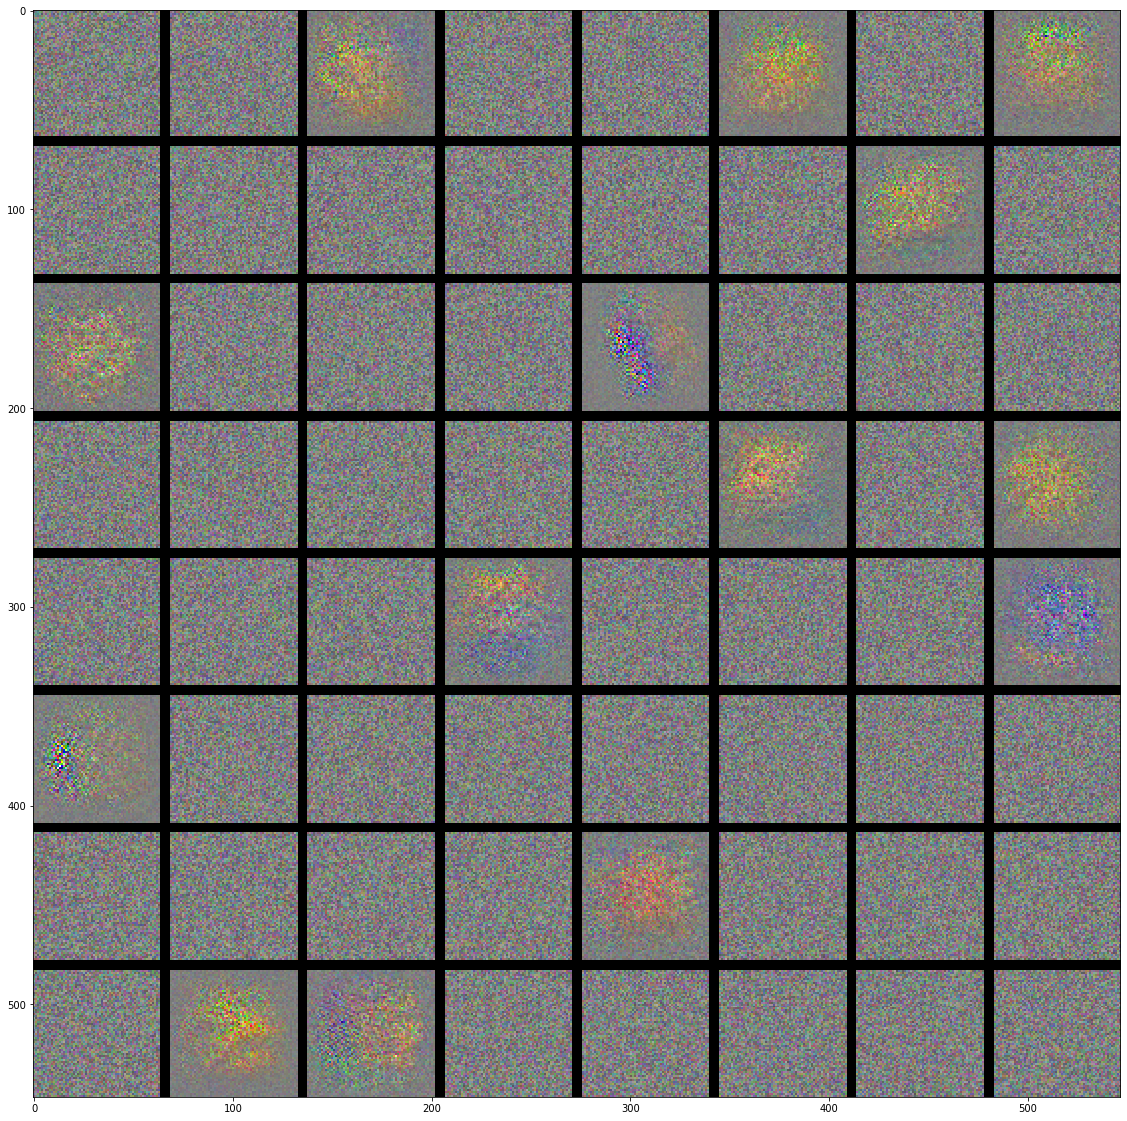

In [29]:
layer_name = 'conv2d_4'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
  for j in range(8):
    filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
    
    horizontal_start = i * size + i * margin
    horizontal_end = horizontal_start + size
    vertical_start = j * size + j * margin
    vertical_end = vertical_start + size
    results[horizontal_start:horizontal_end,
            vertical_start:vertical_end] = filter_img/255

plt.figure(figsize=(20, 20))
plt.imshow(results)

$\color{red}{\text{Write your answer here}}$

همانطور که در بالا مشاهده میکنیم لایه اول شامل فیلترهاییست که رنگ و جهت های تصویر را تشخیص می دهند و نسبت به آنها واکنش نشان می دهند. لایه بعدی رنگ ها و جهت ها را ترکیب کرده و فیلترهایی بدین منظور دارد. به طور کلی هرچه در لایه ها جلوتر می رویم جزییات بیشتر شده و با ترکیب شدن فیلترهای قبلی جزییات بیشتری را تشخیص می دهند مثلا بعضی فیلترها شکل قالب ماشین را تشخیص می دهند با بعضی برای تشخیص پلاک ماشین به کار می روند

# Submission

Congratulations! You finished the assignment & you're ready to submit your work. Please follow the instruction:

1. Check and review your answers. Make sure all of the cell outputs are what you want. 
2. Select File > Save.
3. Run **Create Submission** cell, It may take several minutes and it may ask you for your credential.
4. Run **Download Submission** cell to obtain your submission as a zip file.
5. Grab downloaded file (`dl_asg02__xx__xx.zip`) and submit it via [https://forms.gle/Fb7gvVJHp8RePvo6A](https://forms.gle/Fb7gvVJHp8RePvo6A).

**Note: ** We need your Github token to create (if doesn't exist previously) new repository to store learned model data. Also Google Drive token enables us to download the current notebook & create a submission. If you are interested feel free to check our code.

## Create Submission (Run the cell)

In [0]:
#@title
! pip install -U --quiet PyDrive > /dev/null
! wget -q https://github.com/github/hub/releases/download/v2.10.0/hub-linux-amd64-2.10.0.tgz 
  
import os
import time
import yaml
import json

from google.colab import files
from IPython.display import Javascript
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

asg_name = 'assignment_02'
script_save = '''
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});
'''
repo_name = 'iust-deep-learning-assignments'
submission_file_name = 'dl_asg02__%s__%s.zip'%(student_id, student_name.lower().replace(' ',  '_'))

! tar xf hub-linux-amd64-2.10.0.tgz
! cd hub-linux-amd64-2.10.0/ && chmod a+x install && ./install
! hub config --global hub.protocol https
! hub config --global user.email "$Your_Github_account_Email"
! hub config --global user.name "$student_name"
! hub api --flat -X GET /user
! hub api -F affiliation=owner -X GET /user/repos > repos.json

repos = json.load(open('repos.json'))
repo_names = [r['name'] for r in repos]
has_repository = repo_name in repo_names
if not has_repository:
  get_ipython().system_raw('! hub api -X POST -F name=%s /user/repos > repo_info.json' % repo_name)
  repo_info = json.load(open('repo_info.json')) 
  repo_url = repo_info['clone_url']
else:
  for r in repos:
    if r['name'] == repo_name:
      repo_url = r['clone_url']
  
stream = open("/root/.config/hub", "r")
token = list(yaml.load_all(stream))[0]['github.com'][0]['oauth_token']
repo_url_with_token = 'https://'+token+"@" +repo_url.split('https://')[1]

! git clone "$repo_url_with_token"
! cp -r "$ASSIGNMENT_PATH" "$repo_name"/
! cd "$repo_name" && git add -A
! cd "$repo_name" && git commit -m "Add assignment 02 results"
! cd "$repo_name" && git push -u origin master

sub_info = {
    'student_id': student_id,
    'student_name': student_name, 
    'repo_url': repo_url,
    'asg_dir_contents': os.listdir(str(ASSIGNMENT_PATH)),
    'dateime': str(time.time()),
    'asg_name': asg_name
}
json.dump(sub_info, open('info.json', 'w'))

Javascript(script_save)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = drive.ListFile({'q':"title='%s.ipynb'"%asg_name}).GetList()[0]['id']
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('%s.ipynb'%asg_name) 

! jupyter nbconvert --to script "$asg_name".ipynb > /dev/null
! jupyter nbconvert --to html "$asg_name".ipynb > /dev/null
! zip "$submission_file_name" "$asg_name".ipynb "$asg_name".html "$asg_name".txt info.json > /dev/null

print("##########################################")
print("Done! Submisson created, Please download using the bellow cell!")

github.com username: amnikoo
github.com password for amnikoo (never stored): 
.login	amnikoo
.id	41013033
.node_id	MDQ6VXNlcjQxMDEzMDMz
.avatar_url	https://avatars1.githubusercontent.com/u/41013033?v=4
.gravatar_id	
.url	https://api.github.com/users/amnikoo
.html_url	https://github.com/amnikoo
.followers_url	https://api.github.com/users/amnikoo/followers
.following_url	https://api.github.com/users/amnikoo/following{/other_user}
.gists_url	https://api.github.com/users/amnikoo/gists{/gist_id}
.starred_url	https://api.github.com/users/amnikoo/starred{/owner}{/repo}
.subscriptions_url	https://api.github.com/users/amnikoo/subscriptions
.organizations_url	https://api.github.com/users/amnikoo/orgs
.repos_url	https://api.github.com/users/amnikoo/repos
.events_url	https://api.github.com/users/amnikoo/events{/privacy}
.received_events_url	https://api.github.com/users/amnikoo/received_events
.type	User
.site_admin	false
.name	
.company	
.blog	
.location	
.email	
.hireable	
.bio	
.public_repos	2
.

## Download Submission (Run the cell)

In [0]:
#@title
files.download(submission_file_name)

If that cell makes an error when running you can download file dl_asg02_your_struden_id_your_name.zip from left panel and files section by right-clicking on it and choosing download button.

# Special Thanks

Special thanks to Amirhossein Kazemnejad and Kiamehr Razaee for creating the template of deep learning course assignments.